In [7]:

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures #polynomial
from sklearn.pipeline import make_pipeline #polynomial 
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
#load and preprocess the data
#need to label my X_test, X_train, Y_test, Y_train
y_train = pd.read_csv(r'C:\Users\14037\Downloads\Biomed 415\Kaylas_Models\BMEN-415\Data\_split datasets\classification_ytrain.csv')
X_train = pd.read_csv(r'C:\Users\14037\Downloads\Biomed 415\Kaylas_Models\BMEN-415\Data\_split datasets\classification_Xtrain.csv')
y_test = pd.read_csv(r'C:\Users\14037\Downloads\Biomed 415\Kaylas_Models\BMEN-415\Data\_split datasets\classification_ytest.csv')
X_test = pd.read_csv(r'C:\Users\14037\Downloads\Biomed 415\Kaylas_Models\BMEN-415\Data\_split datasets\classification_Xtest.csv')

print(X_train.shape)
print(y_train.shape)


(426, 30)
(426, 1)


In [9]:
#Train the Naive bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)


c:\Users\14037\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

Training accuracy: 0.9483568075117371
Testing accuracy: 0.9440559440559441


Text(0.5, 1.0, 'Navie Bayes Model')

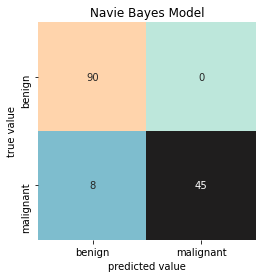

In [10]:
#Make predictions and evaluate the model

y_train_pred1 = nb.predict(X_train)
y_test_pred1 = nb.predict(X_test)

print('Training accuracy:', accuracy_score(y_train, y_train_pred1))
print('Testing accuracy:', accuracy_score(y_test, y_test_pred1))

confusion = confusion_matrix(y_test, y_test_pred1)
sns.heatmap(confusion, square = True, annot = True, cbar = False, cmap = 'icefire', 
            xticklabels = ['benign', 'malignant'], yticklabels = ['benign', 'malignant'])

plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Navie Bayes Model')

In [11]:
#Train the Logistic Regression Model

lr = LogisticRegression()
lr.fit(X_train,y_train)


c:\Users\14037\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\Users\14037\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Training accuracy: 0.9436619718309859
Testing accuracy: 0.9370629370629371


Text(0.5, 1.0, 'Logistic Regression Model')

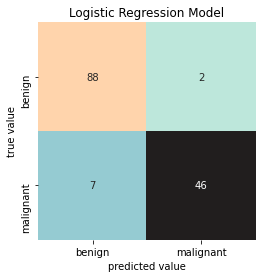

In [12]:
#make predictions using LR from the test data

y_train_pred2 = lr.predict(X_train)
y_test_pred2 = lr.predict(X_test)

print('Training accuracy:', accuracy_score(y_train, y_train_pred2))
print('Testing accuracy:', accuracy_score(y_test, y_test_pred2))

confusion = confusion_matrix(y_test, y_test_pred2)
sns.heatmap(confusion, square = True, annot = True, cbar = False, cmap = 'icefire', 
            xticklabels = ['benign', 'malignant'], yticklabels = ['benign', 'malignant'])

plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Logistic Regression Model')

In [13]:
#Train the Random Forest Model
rf = RandomForestClassifier() #maybe increase the n_estimator to have a higher accuracy.
rf.fit(X_train,y_train) #test, test??

<ipython-input-13-f76c7fd113cd>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train) #test, test??


RandomForestClassifier()

Training accuracy: 1.0
Testing accuracy: 0.972027972027972


Text(0.5, 1.0, 'Random Forest Model')

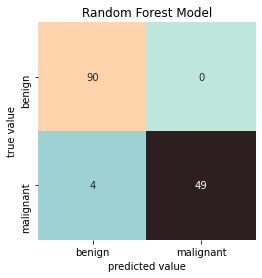

In [14]:
#make predictions using the rf model and test data
y_train_pred3 = rf.predict(X_train)
y_test_pred3 = rf.predict(X_test)

print('Training accuracy:', accuracy_score(y_train, y_train_pred3))
print('Testing accuracy:', accuracy_score(y_test, y_test_pred3))

confusion = confusion_matrix(y_test, y_test_pred3)
sns.heatmap(confusion, square = True, annot = True, cbar = False, cmap = 'icefire', 
            xticklabels = ['benign', 'malignant'], yticklabels = ['benign', 'malignant'])

plt.xlabel('predicted value')
plt.ylabel('true value')
plt.title('Random Forest Model')

c:\Users\14037\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Training accuracy: 0.960093896713615
Testing accuracy: 0.965034965034965


c:\Users\14037\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(91.68, 0.5, 'true value')

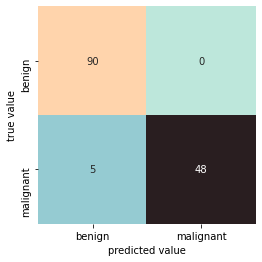

In [15]:
# Define the logistic regression model with polynomial terms
#training accuracy is slighly higher
logreg_poly = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LogisticRegression(solver='lbfgs')
)

# Fit the model to the data and make predictions
logreg_poly.fit(X_train, y_train)
y_train_pred4 = logreg_poly.predict(X_train)
y_test_pred4 = logreg_poly.predict(X_test)

# Evaluate the accuracy of the model
print('Training accuracy:', accuracy_score(y_train, y_train_pred4))
print('Testing accuracy:', accuracy_score(y_test, y_test_pred4))

confusion = confusion_matrix(y_test, y_test_pred4)
sns.heatmap(confusion, square = True, annot = True, cbar = False, cmap = 'icefire', 
            xticklabels = ['benign', 'malignant'], yticklabels = ['benign', 'malignant'])

plt.xlabel('predicted value')
plt.ylabel('true value')
